<h1> Lecture 9: The Likelihood </h1>

<p>For every single measurent and a defined pdf f(x) associated we calculare le likelihood as the product of the pdf evaluated on the single measurement respect a parameter we want to estimate</p> 

$$L(\theta)=\prod_{i}^{N}f(x_{i},\theta)$$

<p> An example of parameter of a pdf f(x) can be in the gaussian distribution the mean and the standard deviation </p>

<p> is it possible to define a log likelihood function as below in this kind of way the numerical operation is more stable </p>

$$log(L(\theta)) = \sum_{i = 1}^N log(f(x_{i}, \theta ))$$

In [2]:
from math import log

#------------------------------------------------------------------------------------
#this method calculate le loglikelihood of a parameter theta  and return it's value
#------------------------------------------------------------------------------------

def loglikelihood(pdf,theta, sample):
    
    loglike = 0 

    for x in sample:
        if pdf(x,theta) > 0.: loglike += log(pdf(x,theta))
    
    return loglike
    

<h3> Exercise 9.1 </h3>
<p> Write a program that generates pseudo-random numbers distributed according to an exponential function and stores them in a list. </p>

In [3]:
import random
import numpy as np

# ---------------------------------------------------------------------------------------------------------------
#this method  generate a single event that follow an exponential pdf
#---------------------------------------------------------------------------------------------------------------

def rand_exp(tau,seed = 0.):
     
     if tau <= 0. : raise ValueError('Tau must be a positive number')
     if seed != 0. : random.seed(float(seed))
     y = random.random()
     f = lambda y : -tau*np.log(1-y) # cumulative distribution function for an exponential pdf(x)
     return f(y)

def generate_exp(tau,N,seed = 0.):
     exp = []
     if seed != 0. : random.seed(float(seed))
     for i in range(N): exp.append(rand_exp(tau,seed))
     return exp

def main():
    
    tau = 2.
    N = 50

    sample = generate_exp(tau,N)
    print(sample)

if __name__ == "__main__": main()


[0.34751421273693056, 0.914313888220614, 0.22205320171535092, 3.0058816474603107, 0.016546624496298967, 2.413094288815126, 8.64019695715205, 1.3684063090030865, 0.3030300423009156, 0.11724231223679077, 1.3231248997276608, 0.4574677027486768, 4.8810668653605305, 1.284214418779659, 1.6794372145251897, 3.8143802012092975, 3.2745757624214775, 3.792039649867181, 7.532368003190375, 3.1440665245665684, 2.1378176359231293, 2.025858036419591, 2.976378010251037, 11.01778875197869, 6.3193582406965625, 8.487651227738796, 3.923842724804772, 2.2595848243914927, 1.4115054387999462, 1.667132259687229, 11.30190209618869, 0.47987105533028984, 0.6768671074501585, 3.8285004728692735, 1.424738163358473, 1.9403689015101453, 4.213336012024112, 0.6035478854666035, 0.2240955451344865, 2.2948572426936202, 0.44021777500899667, 0.028472065668096562, 10.832341264586661, 1.3498771635281217, 0.6323404517177837, 0.13186468622492364, 0.1561937615076292, 4.665392345686613, 1.0364085356703066, 4.0435332460904245]


<h3> Exercise 9.2 </h3>
<p>Add to the previous program the source code that fills a histogram with the numbers present in the list where they have been transferred, and displays the histogram on the screen. </p>

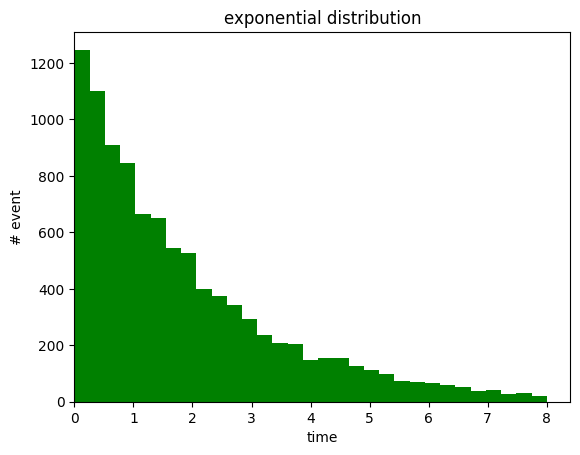

In [4]:
from math import ceil
import matplotlib.pyplot as plt 

#---------------------------------------------------------------------------------------------------------------
#This function calculate the optimal numbers of bins for making an in Histogram un function of the number of 
#events
#---------------------------------------------------------------------------------------------------------------

def sturges(N_events):
    
    if len(N_events) != 1 :
        return ceil(1+3.322 * np.log(len(N_events)))
    else:
        return ceil(1+3.322 * np.log(N_events))

# ---------------------------------------------------------------------------------------------------------------

def main():
    
    tau = 2.
    N = 10000

    measure = generate_exp(tau,N)
    xmin = 0
    xmax = 4*tau
    nbins = sturges(measure)
    bins_edges = np.linspace(xmin,xmax,nbins)

    plt.hist(measure,bins = bins_edges, color = 'green')
    plt.xlim(0)
    plt.title("exponential distribution")
    plt.xlabel("time")
    plt.ylabel("# event")

    

    
    
if __name__ == '__main__': main()


<h3> Exercise 9.3 </h3>
<p>Write a program that plots the exponential probability distribution with a fixed parameter t0. </p>

Text(0.5, 0, 'time')

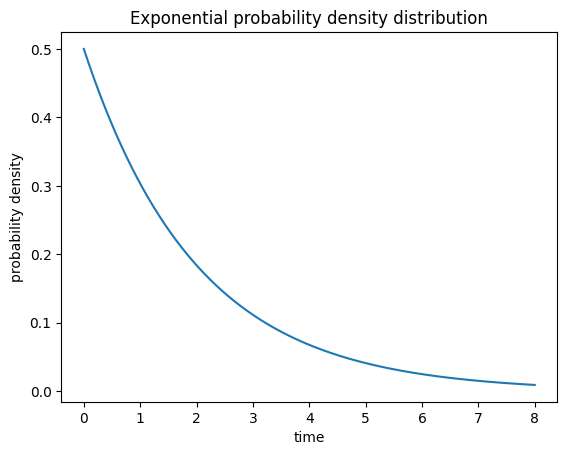

In [5]:
from math import exp

def exp_func(x,tau):
    
    expr = lambda x : 1/tau*exp(-x/tau)
    return expr(x)

tau = 2.0

xmin = 0
xmax = 4*tau

x = np.linspace(xmin,xmax,1000)
y = []
for i in range(x.size):
    y.append(exp_func(x[i],tau))

plt.plot(x,y)
plt.title('Exponential probability density distribution')
plt.ylabel('probability density')
plt.xlabel('time')



<h3> Exercise 9.4 </h3>
<p> Write a function likelihood that calculates the likelihood as the parameter t0 varies, for a sample of pseudo-random events generated according to the instructions of Exercise 1.

How does the result depend on the number of events in the sample? </p>

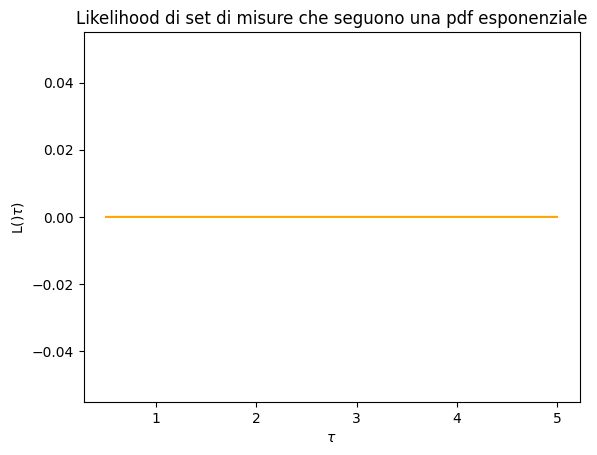

In [10]:
from math import prod

def likelihood(pdf,theta,sample):
    result = 1
    for x in sample:
        result *= pdf(x,theta)
    
    return result


def main():
    tau = 2.
    N_evt = 800
    sample = generate_exp(tau,N_evt)

    tau = np.linspace(0.5,5.,10000)
    like = []
    
    for i in range(tau.size):
        
        like.append(likelihood(exp_func,tau[i],sample))

    plt.plot(tau,like, color = 'orange')
    plt.xlabel(r'$\tau$')
    plt.ylabel('L()' + r'$\tau$' + ')')
    plt.title('Likelihood di set di misure che seguono una pdf esponenziale')





if __name__ == "__main__": main()




    

<p> We observe that for the sample of measure that follows a exponential distribution, the likelihood is the same for al tau parameter => the likelihood is not sensible at the changing of the parameter.</p>

<h3> Exercise 9.5 </h3>

<p> Write a function loglikelihood that calculates the logarithm of the likelihood as the parameter t0 varies, for a sample of pseudo-random events generated according to the instructions of Exercise 1. Remember that the logarithm of the likelihood is defined only when the likelihood is strictly positive.</p>

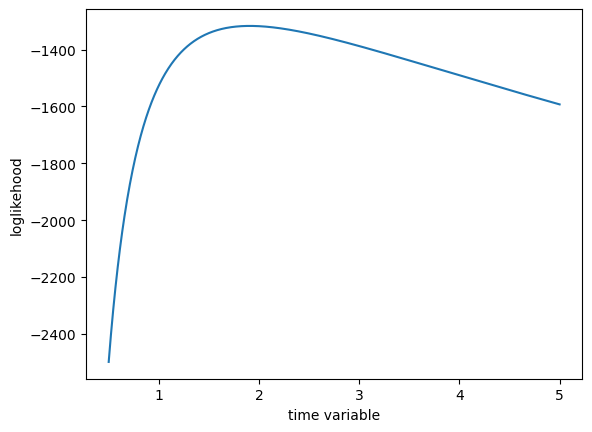

In [7]:

def main():
    
    tau = 2.
    N_evnt = 800
    sample = generate_exp(tau,N_evnt)
    
    tau = np.linspace(0.5,5.,1000)
    loglike = []
    
    for i in range(tau.size):
        
        loglike.append(loglikelihood(exp_func,tau[i],sample))

    plt.plot(tau,loglike)
    plt.xlabel('time variable')
    plt.ylabel('loglikehood')

if __name__ == "__main__": main()
    

<h3> Exercise 9.6 </h3>

<p>Study the behavior of the shape of the log-likelihood as a function of the number of events comprising the generated sample. </p>

50


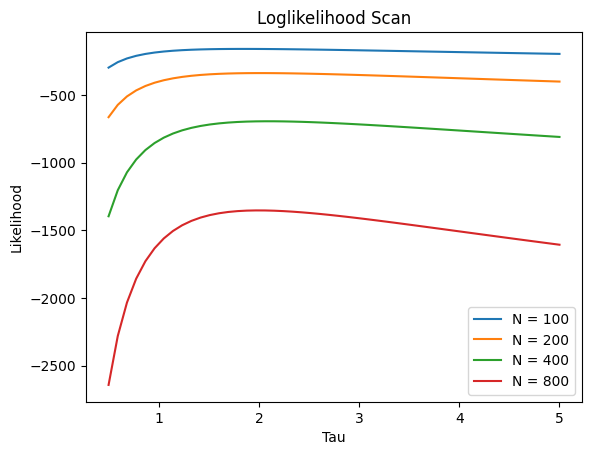

In [8]:
def main():

    tau = 2.
    Nmin = 100
    Nmax = 1000
    
    taus = np.linspace(0.5,5.,50)
    loglike = []
    loga = []
    N = []

    while Nmin < Nmax:
        
        sample = generate_exp(tau,Nmin)
        for i in range(taus.size):
            loglike.append(loglikelihood(exp_func,taus[i],sample))
        
        loga.append(loglike)
        loglike = []
        N.append(Nmin)
        Nmin *= 2

    print(taus.size)
    
    for i in range(len(N)):
        plt.plot(taus,loga[i],label = "N = " + str(N[i]))

    plt.title("Loglikelihood Scan")
    plt.xlabel("Tau")
    plt.ylabel("Likelihood")
    plt.legend()


if __name__ == "__main__": main()  